Linear Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


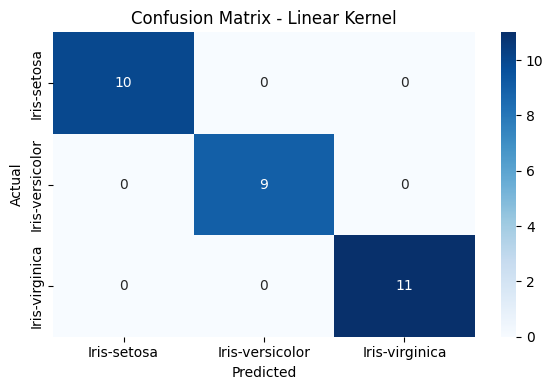


RBF Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


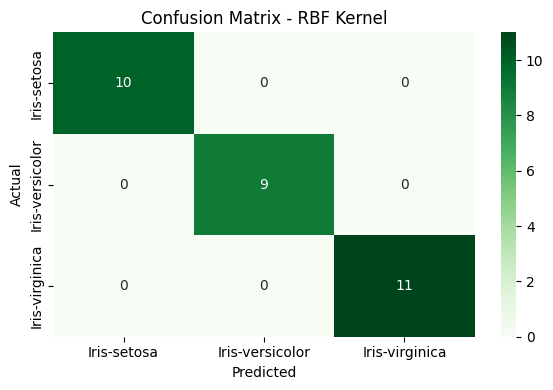

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the IRIS dataset
iris_df = pd.read_csv("/content/iris (1) (1).csv")

# Split into features and target
X = iris_df.drop("species", axis=1)
y = iris_df["species"]

# Split into training and testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- SVM with Linear Kernel ---
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Accuracy and Confusion Matrix
acc_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

print("Linear Kernel:")
print("Accuracy:", acc_linear)
print("Confusion Matrix:\n", cm_linear)

# Plot Confusion Matrix for Linear Kernel
plt.figure(figsize=(6, 4))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues",
            xticklabels=svm_linear.classes_, yticklabels=svm_linear.classes_)
plt.title("Confusion Matrix - Linear Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- SVM with RBF Kernel ---
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Accuracy and Confusion Matrix
acc_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

print("\nRBF Kernel:")
print("Accuracy:", acc_rbf)
print("Confusion Matrix:\n", cm_rbf)

# Plot Confusion Matrix for RBF Kernel
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Greens",
            xticklabels=svm_rbf.classes_, yticklabels=svm_rbf.classes_)
plt.title("Confusion Matrix - RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Accuracy: 0.95
Confusion Matrix:
 [[148   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1 147   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 126   0   2   0   2   1   0   0   2   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 153   0   0   0   1   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   0 135   0   3   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   1   0   0   1 134   0   0   1   0   0   0   0   0   0   1   0   0
    0   2   0   0   0   0   0   0]
 [  0   0   1   3   0   0 153   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   3   0   4   0   0   1 118   0   0   4   0   0   1   2   0   0   8
    0   0   1   0   0   1   1   0]
 [  0   0   0   0   0   2   0   0 136   7   0   0   0   0   0   0   0   0
    0   0   0   0   

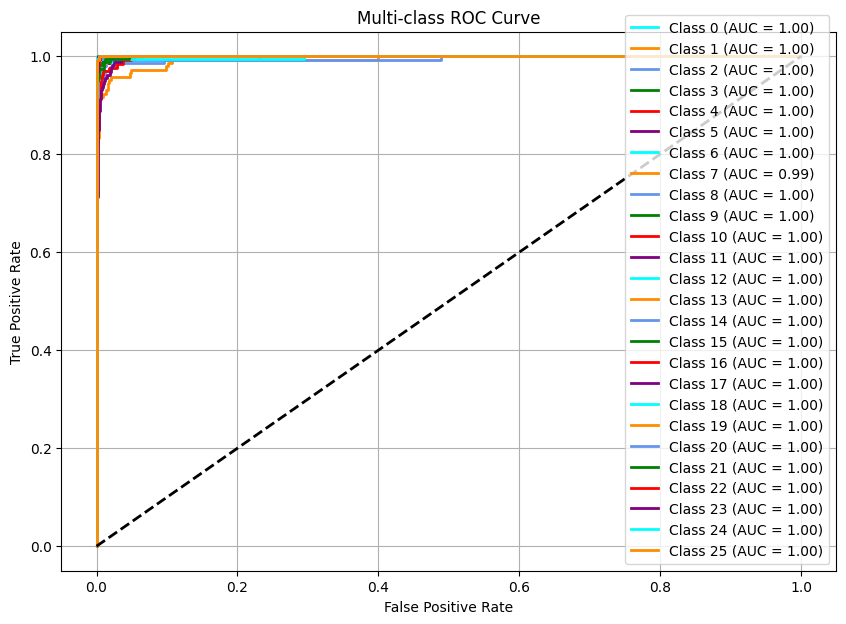

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Load dataset
letter_df = pd.read_csv("/content/letter-recognition.csv")  # Update path if needed
letter_df['letter'] = LabelEncoder().fit_transform(letter_df['letter'])

# Split features and labels
X = letter_df.drop('letter', axis=1)
y = letter_df['letter']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)

# Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC and AUC (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(10, 7))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()
